In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

import numpy as np
# 기본 옵션들
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.font_manager as fm
mpl.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

set_matplotlib_formats('retina')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 전체 데이터셋 구성
- 4568개

In [2]:
YN=pd.read_csv('@crawling_data/YN.csv',encoding='utf-8-sig')
SW=pd.read_csv('@crawling_data/SW.csv',encoding='utf-8-sig')
MB=pd.read_csv('@crawling_data/MB.csv',encoding='utf-8-sig')
MR=pd.read_csv('@crawling_data/MR.csv',encoding='utf-8-sig')
SB=pd.read_csv('@crawling_data/SB.csv',encoding='utf-8-sig')
SS=pd.read_csv('@crawling_data/SS.csv',encoding='utf-8-sig')
KC=pd.read_csv('@crawling_data/KC.csv',encoding='utf-8-sig')

In [64]:
df=pd.concat([YN,SW,MB,MR,SB,SS,KC])
df.to_csv('total_youtuber_crawling_data.csv', encoding='utf-8-sig')
df.head()

,Unnamed: 0,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num
0,0,취미로 요리하는 남자 Yonam - YouTube,구독자 55.6만명,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피),최초 공개: 2020. 3. 25.,"245,137회",5.8천개,67개
1,0,취미로 요리하는 남자 Yonam - YouTube,구독자 55.6만명,sub)요리하는 남자의 간단한 집들이음식,최초 공개: 2020. 3. 4.,"630,196회",9.5천개,124개
2,0,취미로 요리하는 남자 Yonam - YouTube,구독자 55.6만명,(종료)제가 여러분께 요리를 해드립니다.,2020. 2. 20.,"160,997회",3.4천개,21개
3,0,취미로 요리하는 남자 Yonam - YouTube,구독자 55.6만명,sub)요리사들이 한 자리에 모이면 벌어지는 일.,최초 공개: 2020. 2. 4.,"1,962,881회",2.1만개,384개
4,0,취미로 요리하는 남자 Yonam - YouTube,구독자 55.6만명,sub)요리하는 남자들의 흔한 파티음식.,최초 공개: 2020. 1. 23.,"720,225회",9천개,144개


In [65]:
df.shape
df.info()
df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)

(4568, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4568 entries, 0 to 503
Data columns (total 8 columns):
Unnamed: 0      4568 non-null int64
youtuber        4568 non-null object
subscribers     4568 non-null object
name            4568 non-null object
upload_date     4568 non-null object
hits            4568 non-null object
likes_num       4568 non-null object
dislikes_num    4568 non-null object
dtypes: int64(1), object(7)
memory usage: 321.2+ KB


Index(['Unnamed: 0', 'youtuber', 'subscribers', 'name', 'upload_date', 'hits',
       'likes_num', 'dislikes_num'],
      dtype='object')

# 데이터 전처리
- youtuber

In [5]:
df.youtuber.unique()
df['youtuber'] = df['youtuber'].apply(lambda x: x.split('-')[0])

array(['취미로 요리하는 남자 Yonam - YouTube', '승우아빠 - YouTube',
       '먹어볼래TryToEat - YouTube', '만개의레시피 10K Recipe - YouTube',
       '심방골주부Korean Food Recipes - YouTube', '소소황 Cook & Eat - YouTube',
       '강쉪 - YouTube'], dtype=object)

- subscribers

In [6]:
df['subscribers'] = df['subscribers'].apply(lambda x: x.split(' ')[1])
df['subscribers'] = df['subscribers'].replace('[\.]', '', regex=True) 
df['subscribers'] = df['subscribers'].replace('[\만명]', '000', regex=True) 
df['subscribers'] = pd.to_numeric(df['subscribers'],downcast='integer')
df['subscribers'] = pd.to_numeric(df['subscribers'], downcast='integer')

- upload_date

In [7]:
df['upload_date'] = df['upload_date'].replace('[\최초 공개:]','',regex=True)
df['upload_date'] = df['upload_date'].replace('[\실시간스트리밍시작일]','',regex=True)
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # '4일전' -> NaN으로 우선 처리
df.loc[df['upload_date'].isnull(),:] # 데이터 수집 날짜 - 4일전 = 2020-03.25 로 처리 
df.loc[df['upload_date'].isnull(),'upload_date'] = '2020-03-25'
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # 한번 더

,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num
0,승우아빠,442000000,51시간동안 바베큐한 등갈비,NaT,"29,770회",1.5천개,14개


- hits

In [8]:
df['hits'] = df['hits'].replace('[\회]','',regex=True)
df['hits'] = df['hits'].replace('[\,]','',regex=True)
df['hits'] = pd.to_numeric(df['hits'], downcast='integer')

- likes

In [9]:
df['likes_num'] = df['likes_num'].replace('[\.]', '', regex=True) 
df['likes_num'] = df['likes_num'].replace('[\천개]','00',regex=True)
df['likes_num'] = df['likes_num'].replace('[\만]','0',regex=True)
df['likes_num'] = pd.to_numeric(df['likes_num'], downcast='integer')

- dislikes

In [10]:
df['dislikes_num'] = df['dislikes_num'].replace('[\개]','',regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\천]','00', regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\.]','', regex=True)
df['dislikes_num'] = pd.to_numeric(df['dislikes_num'], downcast='integer')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4568 entries, 0 to 503
Data columns (total 7 columns):
youtuber        4568 non-null object
subscribers     4568 non-null int32
name            4568 non-null object
upload_date     4568 non-null datetime64[ns]
hits            4568 non-null int32
likes_num       4568 non-null int32
dislikes_num    4568 non-null int16
dtypes: datetime64[ns](1), int16(1), int32(3), object(2)
memory usage: 205.2+ KB


In [12]:
df['youtuber_id'] = df['youtuber'].factorize()[0]

- 한번 저장해두기

In [13]:
df.to_csv('@preprocessed_youtube_data.csv', encoding='utf-8-sig')

# name(동영상 제목) NLP 전처리 

In [14]:
import konlpy
from konlpy.tag import Okt
import re

In [15]:
okt = Okt()

In [16]:
df['clean_name'] = df['name']
df

,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num,youtuber_id,clean_name
0,취미로 요리하는 남자 Yonam,556000000,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피),2020-03-25,245137,580000,67,0,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피)
1,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자의 간단한 집들이음식,2020-03-04,630196,950000,124,0,sub)요리하는 남자의 간단한 집들이음식
2,취미로 요리하는 남자 Yonam,556000000,(종료)제가 여러분께 요리를 해드립니다.,2020-02-20,160997,340000,21,0,(종료)제가 여러분께 요리를 해드립니다.
3,취미로 요리하는 남자 Yonam,556000000,sub)요리사들이 한 자리에 모이면 벌어지는 일.,2020-02-04,1962881,21000,384,0,sub)요리사들이 한 자리에 모이면 벌어지는 일.
4,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자들의 흔한 파티음식.,2020-01-23,720225,90000,144,0,sub)요리하는 남자들의 흔한 파티음식.
5,취미로 요리하는 남자 Yonam,556000000,"ENG)요리하는 남자의 글램핑, 스테이크, 비프립, 돌문어, 또 라면...ㅋ",2019-12-05,477349,540000,74,0,"ENG)요리하는 남자의 글램핑, 스테이크, 비프립, 돌문어, 또 라면...ㅋ"
6,취미로 요리하는 남자 Yonam,556000000,취미로 요리하는 남자가 무려 다섯명. feat. 초밥도전,2019-11-26,696346,690000,129,0,취미로 요리하는 남자가 무려 다섯명. feat. 초밥도전
7,취미로 요리하는 남자 Yonam,556000000,SUB) 바닷가에서 먹는 브런치...는 개뿔.,2019-11-14,411963,50000,82,0,SUB) 바닷가에서 먹는 브런치...는 개뿔.
8,취미로 요리하는 남자 Yonam,556000000,SUB) 요리하는 남자가 캠핑카를 타면 벌어지는 일.,2019-10-29,556207,70000,111,0,SUB) 요리하는 남자가 캠핑카를 타면 벌어지는 일.
9,취미로 요리하는 남자 Yonam,556000000,SUB) 요리하는 남자. 캠핑카. 그리고 랍스터.,2019-10-20,808580,950000,211,0,SUB) 요리하는 남자. 캠핑카. 그리고 랍스터.


### 불용어 처리 또는 특수문자 제거
- 한번 만들어봄..
- 요리, 요리사, 여러분 … 의미 없는건 빼기.

In [17]:
my_stopwords = ['ㄴㄴ','.',')','(','를','을','에','도','ㅋ','SUB','sub','가','과','의','이다','는','★','♥','Eng','ENG','Sub','♡','요리','요리사','여러분',\
                '🔥','~!','/','와','이','로','은','으로','하다','에서','만','개','의','레시피','만레','s','%','↗','[',']','심방','골','주부','이렇게',\
                'ㅏ','으아','악','ㄱ','&','l',':','??','랑','…','!','!!','!!!','!!!!','!!!!!','☆','feat','X','x','맛있다','만들기','TV','다',\
               '🍜🍜','🎆🎆','🥤🥤🥤','|','🍜','🎂🎂🎂','#','inin','ㅁ','👍👍','CC','🍓🍓🍓','🌲🌲🌲','with','🍓🍓','aHHHH','♥♥♥','@_','@','@@@',\
                'ㅜㅜ','으스스', '스','강쉪','강슆','!^^','!!^^''^^','DongPo','🔥🔥','☕','😍😍😍😍','🍴','😍😍😍','😥😥','◑◑','♥♥♥♥♥♥','!!!!!!','😜😜😜', 'ง', '•̀', '_', '•́ง','👍']

In [18]:
clean_word = [] 
for i in df['clean_name']:
    
    review_text = re.sub("[12?~3.,()''->\n]", '', i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in my_stopwords]
        
    clean_word.append(' '.join(word_text))
    
df['clean_name'] = clean_word

###  형태소, 품사 처리
- 39946 형태소로 분리됨

In [22]:
pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[3]))
pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[4501]))

,0,1
0,들,Verb
1,자리,Noun
2,모이,Noun
3,면,Noun
4,벌어지다,Verb
5,일,Noun


,0,1
0,보쌈,Noun
1,삼겹살,Noun
2,수육,Noun
3,굴,Noun
4,무생채,Noun
5,황금,Noun
6,Pork,Alpha
7,wraps,Alpha
8,oyster,Alpha
9,kimchi,Alpha


In [23]:
df_pos = pd.DataFrame()
for i in range(0, len(df['clean_name'])) :
    dfn =  pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[i]))
    df_pos = pd.concat([df_pos, dfn])
    
df_pos = df_pos.rename(columns={0:'형태소',1:'품사'})

In [24]:
df_pos

,형태소,품사
0,들,Verb
1,자리,Noun
2,모이,Noun
3,면,Noun
4,벌어지다,Verb
5,일,Noun
6,오리,Noun
7,다리,Noun
8,콩피,Noun
0,남자,Noun


In [25]:
df_pos['품사'].value_counts()

Noun              26134
Verb               4032
Alpha              3464
Adjective          2118
Josa                820
Adverb              507
Exclamation         156
Modifier             80
Foreign              55
Suffix               41
Punctuation          37
KoreanParticle       28
Hashtag              21
Conjunction          12
Eomi                 10
Determiner            4
VerbPrefix            3
PreEomi               1
Name: 품사, dtype: int64

In [26]:
freq = pd.Series(' '.join(df_pos['형태소']).split()).value_counts()
freq.head(10)
freq.tail(10)

법       647
만들다     584
다       427
한       342
가지      340
먹다      258
간단하다    247
볶음      242
밥       224
맛       206
dtype: int64

유니콘          1
지리           1
Wing         1
양도           1
크랜베리         1
폭주           1
캐비어          1
번외편          1
킹크랩          1
Mushrooms    1
dtype: int64

# name(동영상 제목) -> Word Cloud -> 인기 컨텐츠 찾아보기
- Noun              26708  
Alpha              3603  
Adjective          2722  
Adverb             1090  

In [27]:
from wordcloud import WordCloud, STOPWORDS

- 품사가 명사인 것들만

In [28]:
cond1 = (df_pos['품사']=='Noun')
df_N = df_pos.loc[cond1]
df_N.shape
df_N

(26134, 2)

,형태소,품사
1,자리,Noun
2,모이,Noun
3,면,Noun
5,일,Noun
6,오리,Noun
7,다리,Noun
8,콩피,Noun
0,남자,Noun
2,집들이,Noun
3,음식,Noun


In [59]:
wc_N = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=150).generate(' '.join(df_N['형태소']))

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 분야 컨텐츠 키워드 Top 100')

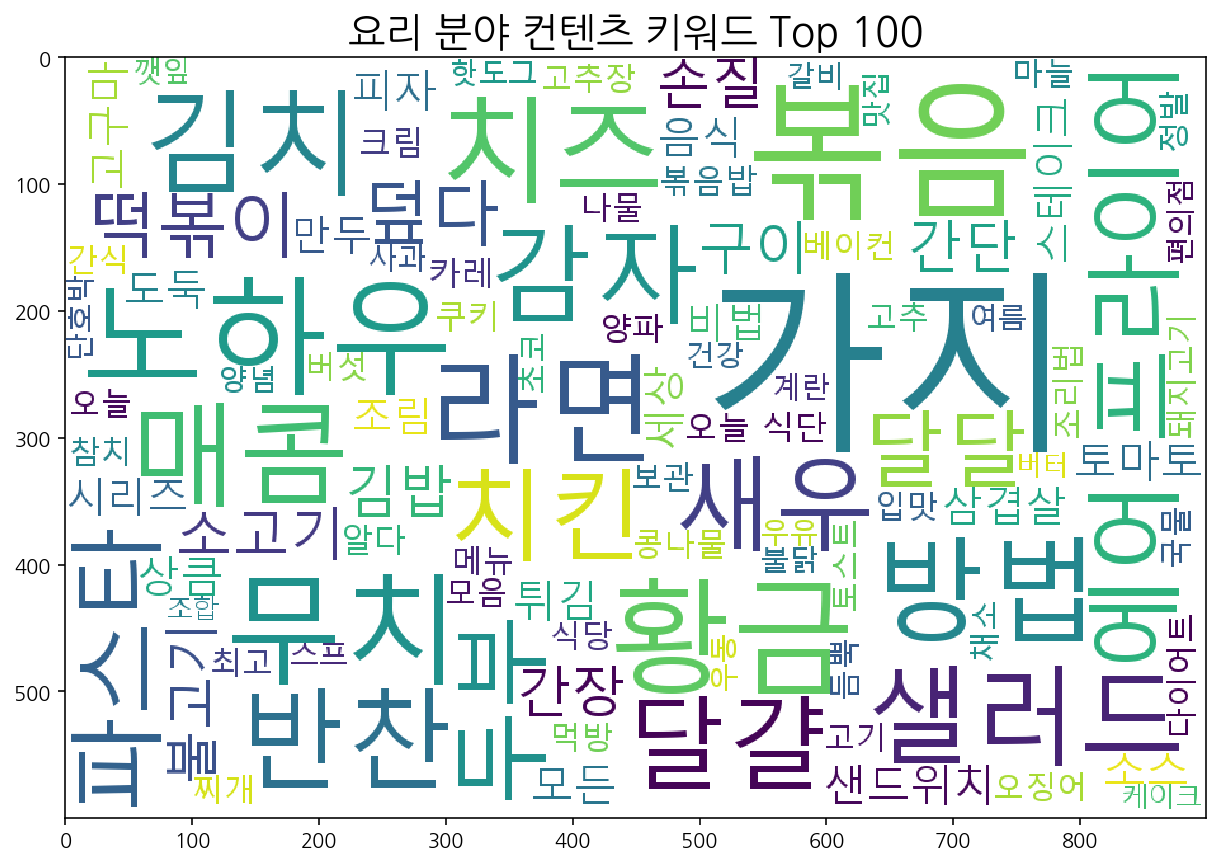

In [63]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') # 글씨 진하게 보이게 하는거

plt.figure(figsize=[13,7])
plt.title('요리 분야 컨텐츠 키워드 Top 100',size=20)
plt.imshow(wc_N)
plt.show()

- 품사에서 alpha인것들만 활용 (영어단어)

In [37]:
cond2 = (df_pos['품사']=='Alpha')
df_A = df_pos.loc[cond2]
df_A.shape
df_A

(3464, 2)

,형태소,품사
3,QnA,Alpha
15,water,Alpha
16,agingwet,Alpha
17,aged,Alpha
18,steakyonam,Alpha
8,sous,Alpha
9,Vide,Alpha
10,beef,Alpha
11,cutlet,Alpha
12,film,Alpha


In [57]:
wc_A = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_A['형태소']))

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 분야 컨텐츠 영어 키워드 Top 100')

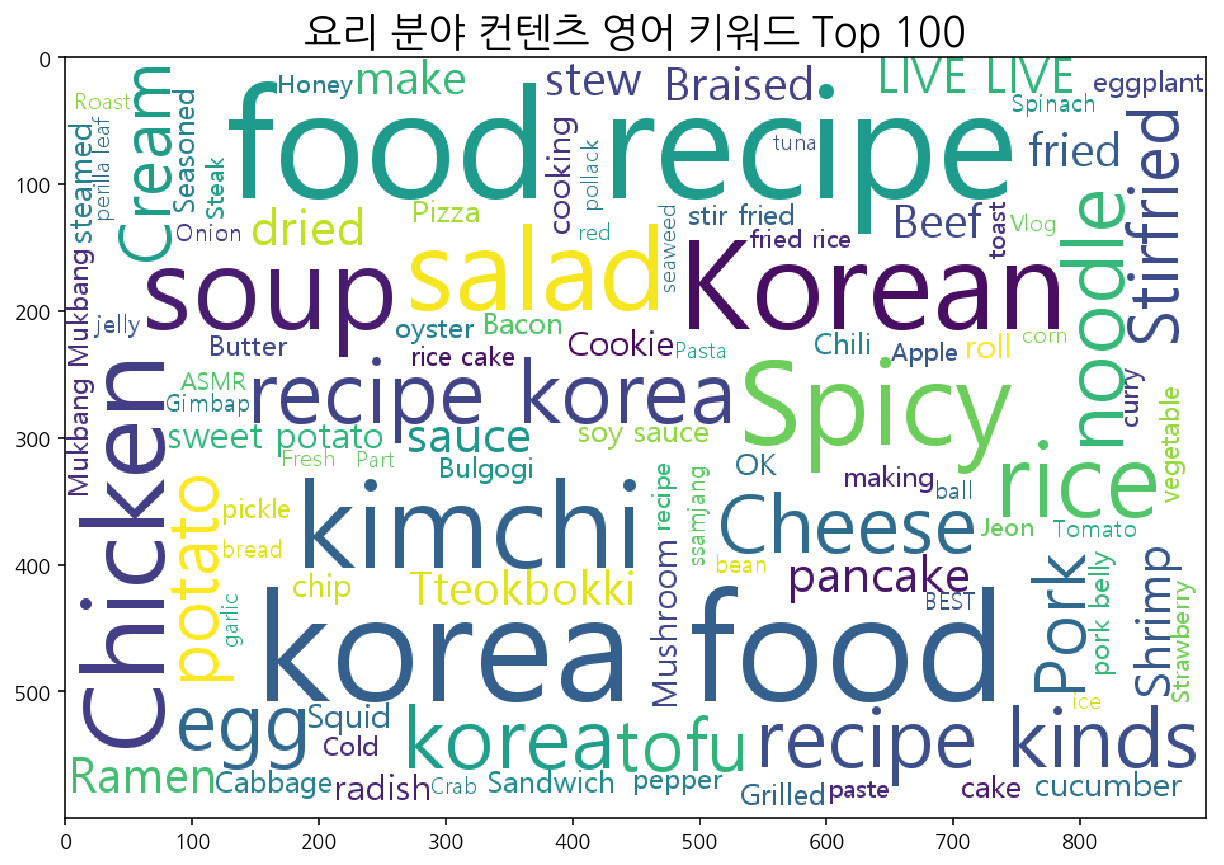

In [58]:
plt.figure(figsize=[13,7])
plt.title('요리 분야 컨텐츠 영어 키워드 Top 100',size=20)
plt.imshow(wc_A)
plt.show()

- 품사에서 형용사인것들만 활용

In [43]:
cond3 = (df_pos['품사']=='Adjective')
df_AD = df_pos.loc[cond3]
df_AD.shape
df_AD

(2118, 2)

,형태소,품사
1,간단하다,Adjective
2,흔하다,Adjective
1,간단하다,Adjective
9,아니다,Adjective
4,간단하다,Adjective
3,흔하다,Adjective
1,간단하다,Adjective
2,안되다,Adjective
1,간단하다,Adjective
1,간단하다,Adjective


<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 동영상 핵심 표현 키워드 Top 100')

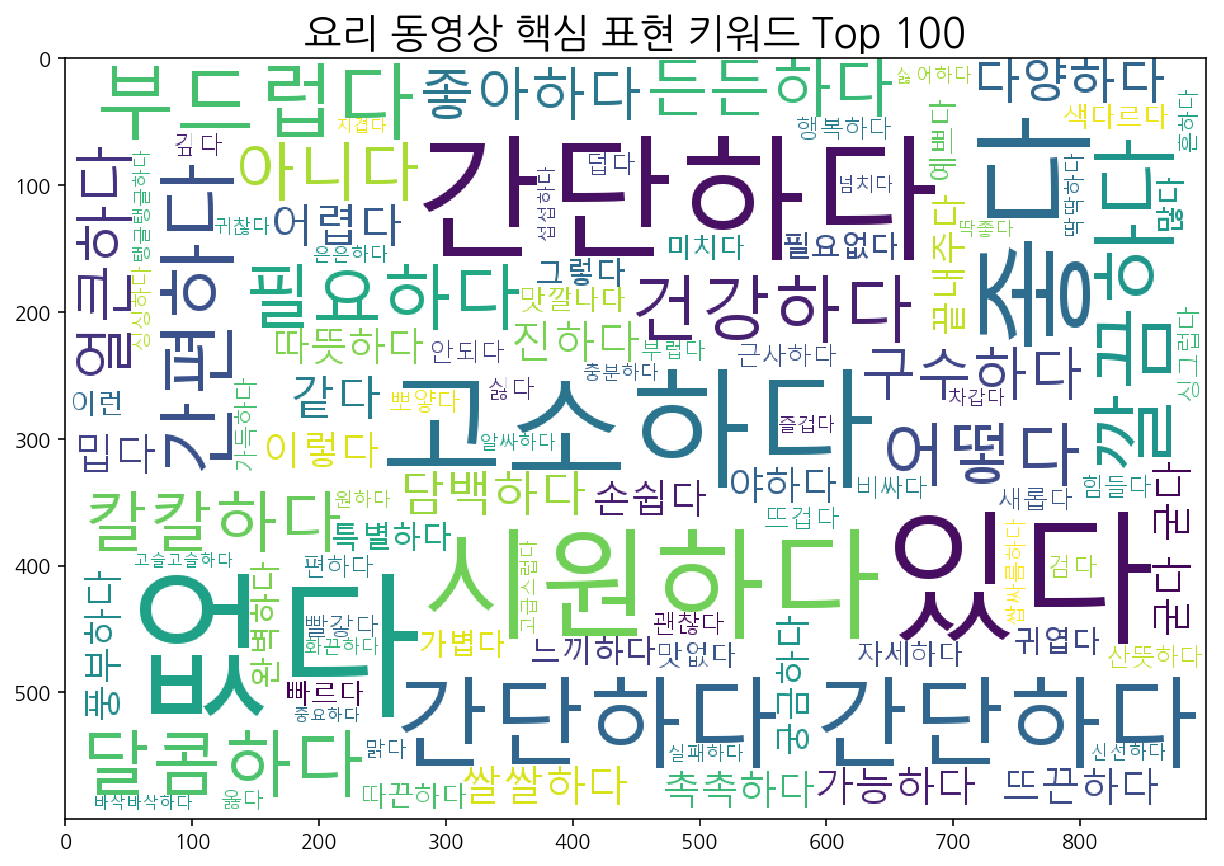

In [55]:
wc_AD = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_AD['형태소']))

plt.figure(figsize=[13,7])
plt.title('요리 동영상 핵심 표현 키워드 Top 100',size=20)
plt.imshow(wc_AD)
plt.show()

- 품사가 adverb인것만

In [49]:
cond4 = (df_pos['품사']=='Adverb')
df_ADV = df_pos.loc[cond4]
df_ADV.shape

(507, 2)

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리와 함께 활용 가능한 키워드 Top 100')

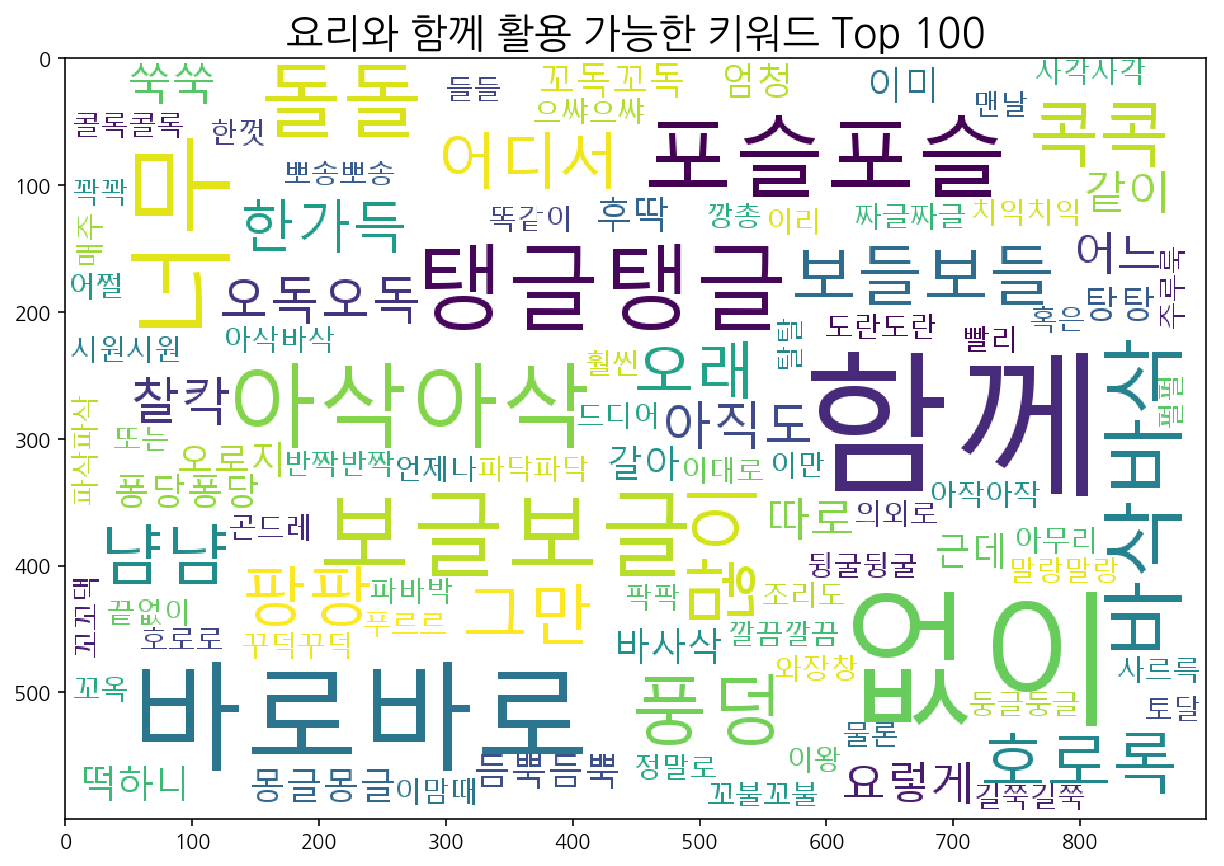

In [56]:
wc_ADV = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_ADV['형태소']))
plt.figure(figsize=[13,7])
plt.title('요리와 함께 활용 가능한 키워드 Top 100',size=20)
plt.imshow(wc_ADV)
plt.show()